<a href="https://colab.research.google.com/github/pk2971/computational-gender-analysis/blob/main/notebooks/Word_cloud_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import zipfile
import xml.etree.ElementTree as ET
import re
from collections import defaultdict
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [2]:
zip_path = '/content/drive/MyDrive/debates.zip'
# Clean and parse XML text
def extract_text_from_speech(xml_bytes):
    try:
        root = ET.fromstring(xml_bytes)
        return ' '.join([p.text or '' for p in root.findall('.//speech//p')])
    except ET.ParseError:
        return ""

In [3]:
nltk.download('punkt_tab')
nltk.download('stopwords')


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [21]:
extended_stopwords = [
    # Standard English stopwords (already in NLTK/Scikit-learn)
    # Custom additions:
    "shall", "may", "also", "must", "however", "therefore", "thus", "hereby", "whereas", "therein",
    "thereof", "herein", "therewith", "thereupon", "hereafter", "herewith", "hereupon", "hereinbefore",
    "hereinafter", "hence", "furthermore", "further", "meanwhile", "nevertheless", "nonetheless",
    "notwithstanding", "wherein", "whereby", "whereupon", "whereof", "whilst", "amongst", "upon",
    "whereas", "aforementioned", "said", "such", "one", "two", "three", "four", "five", "six", "seven",
    "eight", "nine", "ten", "first", "second", "third", "forth", "fifth", "sixth", "seventh", "eighth",
    "ninth", "tenth", "mr", "mrs", "ms", "hon", "honourable", "gentleman", "gentlemen", "lady", "lord",
    "member", "members", "committee", "house", "assembly", "parliament", "motion",
    "debate", "question", "answer", "clause", "subsection", "section", "amendment", "order", "session",
    "speaker", "government", "right", "left", "mr.", "mrs.", "ms.", "hon.",
    "honourable.", "gentleman.", "gentlemen.", "lady.", "lord.", "member.", "members.",
    "house.", "assembly.", "parliament.", "motion.", "debate.", "question.", "answer.",
    "clause.", "subsection.","section", "order.", "session.", "speaker.", "government",
    "minister.","one"
    # Modal verbs, formalities, and filler words
    "would", "could", "should", "might", "can", "will", "do", "does", "did", "done", "being", "having",
    "make", "made", "take", "taken", "give", "given", "get", "got", "go", "going", "say", "said", "come",
    "came", "see", "seen", "think", "thought", "know", "known", "let", "lets", "much", "many", "few",
    "several", "any", "every", "each", "other", "others", "another", "more", "most", "some", "anyone",
    "anything", "everyone", "everything", "none", "nothing", "always", "never", "sometimes", "often",
    "already", "yet", "still", "just", "even", "ever", "back", "forward", "again", "new", "old",
    "whether","put","cannot","like","though","asked","every","got","done","one","two","three","four","five","six",
    "seven","eight","nine","ten","away","would","could","should","might","can","will","do","does","did",

    # Numbers as words
    "zero", "hundred", "thousand", "million", "billion", "trillion",

    # Gendered words
    "man", "men", "woman", "women"
    ]


In [22]:
def generate_word_cloud(zip_path, year_input, target_word, extra_stopwords=[]):
    # Parse year range
    if isinstance(year_input, int):
        start_year, end_year = year_input, year_input
    else:
        start_year, end_year = year_input

    # Extract and process text
    full_text = ""
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        for file_name in zip_ref.namelist():
            if not file_name.endswith('.xml'):
                continue
            base_name = file_name.split('/')[-1]
            year_match = re.search(r'debates(\d{4})', base_name)
            if not year_match:
                continue
            year = int(year_match.group(1))
            if start_year <= year <= end_year:
                with zip_ref.open(file_name) as f:
                    xml_bytes = f.read()
                    full_text += extract_text_from_speech(xml_bytes) + " "

    # Preprocess text: only remove standard English stopwords for co-occurrence
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(full_text.lower())
    words = [word for word in tokens if word.isalpha() and word not in stop_words]

    # Calculate co-occurrences
    window_size = 10
    co_occurrence_counts = defaultdict(int)
    target = target_word.lower()
    for i, current_word in enumerate(words):
        if current_word == target:
            start_idx = max(0, i - window_size // 2)
            end_idx = min(len(words), i + window_size // 2 + 1)
            for j in range(start_idx, end_idx):
                if j == i:
                    continue
                context_word = words[j]
                co_occurrence_counts[context_word] += 1

    # Remove extra_stopwords only from the wordcloud, not from co-occurrence calculation
    for stopword in extra_stopwords+extended_stopwords:
      co_occurrence_counts.pop(stopword.lower(), None)
    # Generate word cloud
    wordcloud = WordCloud(
        width=1200,
        height=600,
        background_color='white',
        max_words=100,
        colormap='viridis'
    ).generate_from_frequencies(co_occurrence_counts)

    plt.figure(figsize=(15, 8))
    plt.title(f"Words associated with '{target_word}' ({start_year}-{end_year})", fontsize=20)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.tight_layout()
    plt.show()


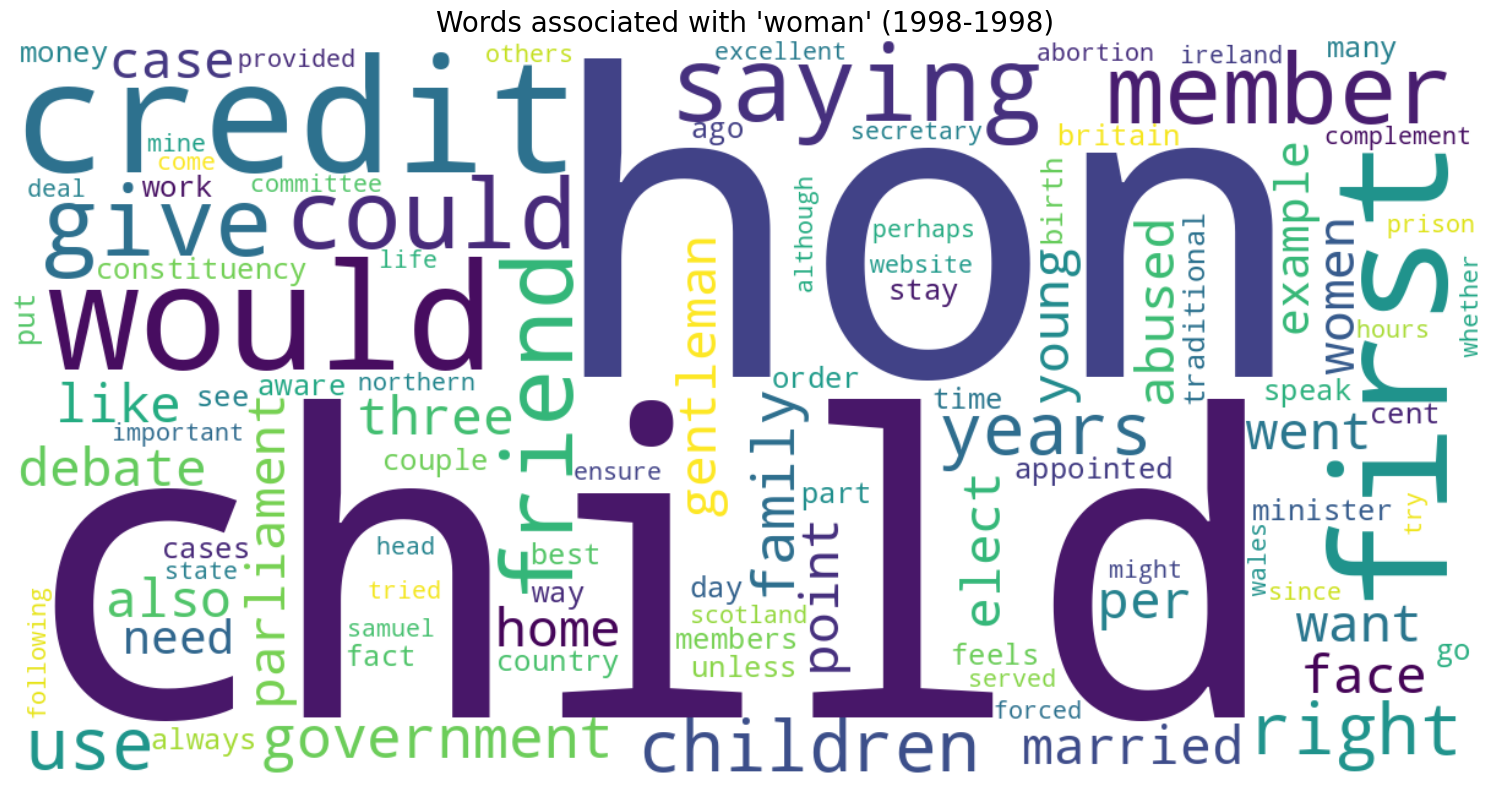

In [ ]:
generate_word_cloud(zip_path, 1998, 'woman',[''])

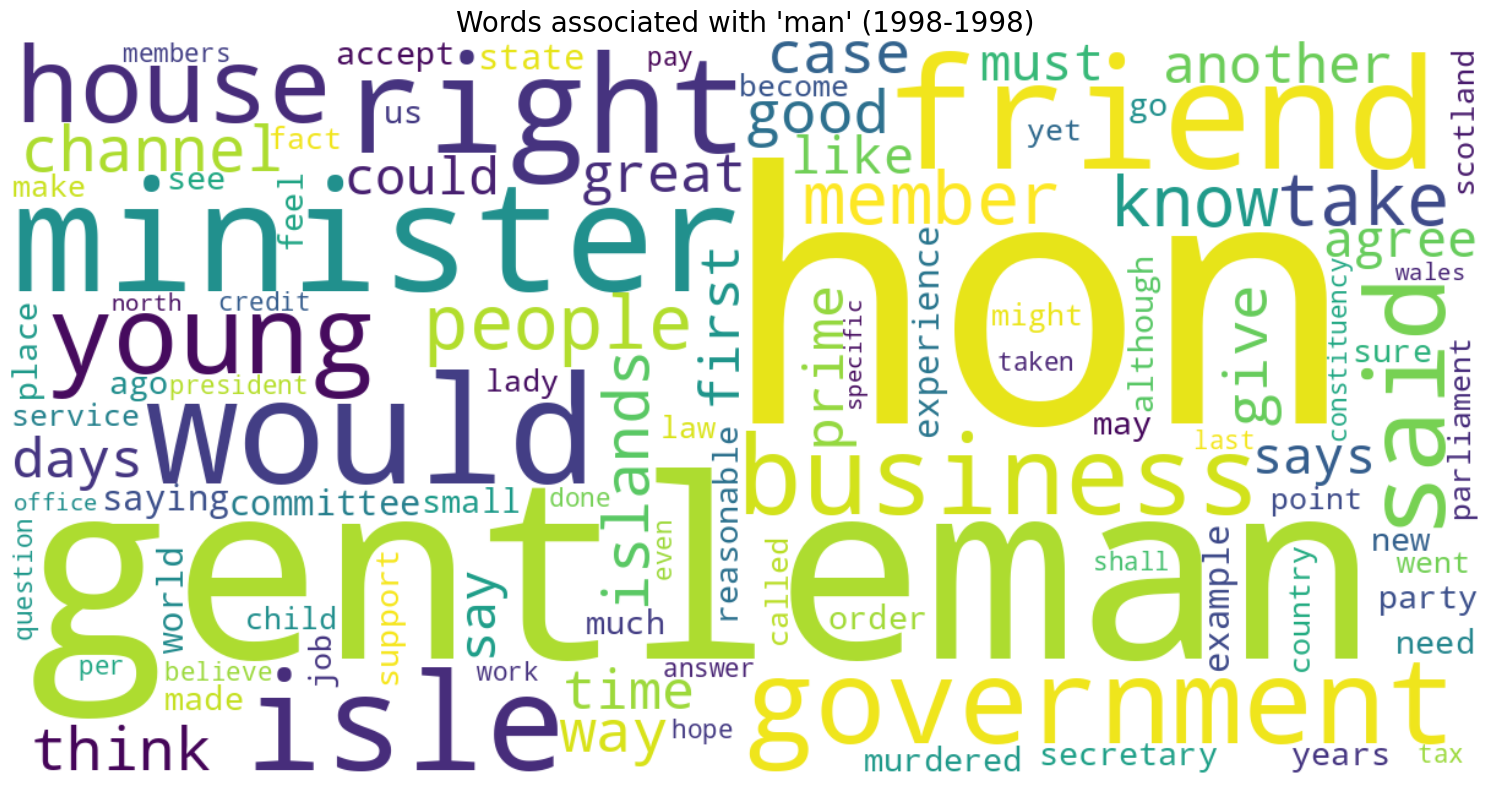

In [ ]:
generate_word_cloud(zip_path, 1998, 'man',['man','woman','men','every','got','one'])

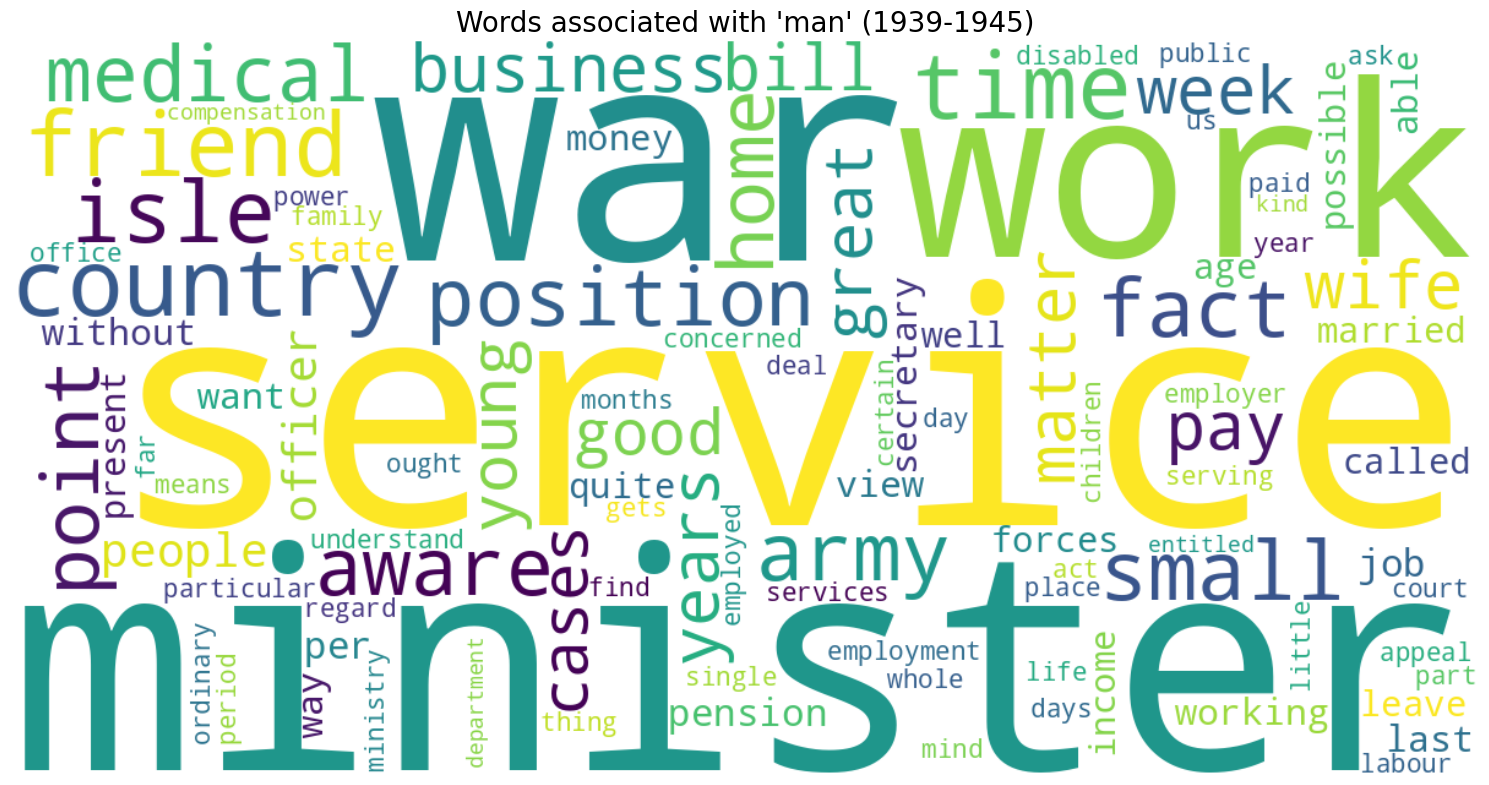

In [23]:
# World War II
generate_word_cloud(zip_path, (1939,1945), 'man',['case'])

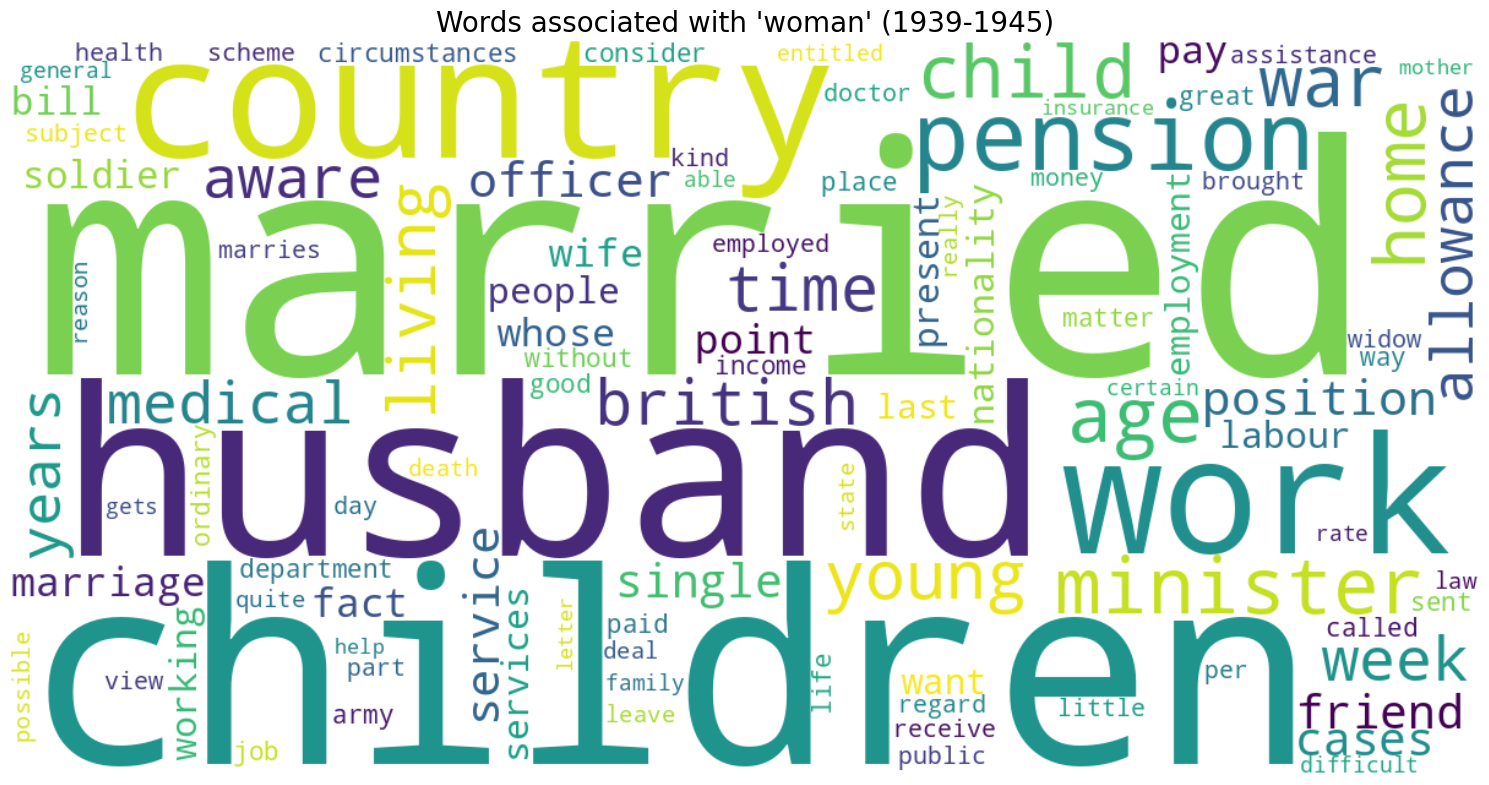

In [24]:
# World War II
generate_word_cloud(zip_path, (1939,1945), 'woman',['case'])

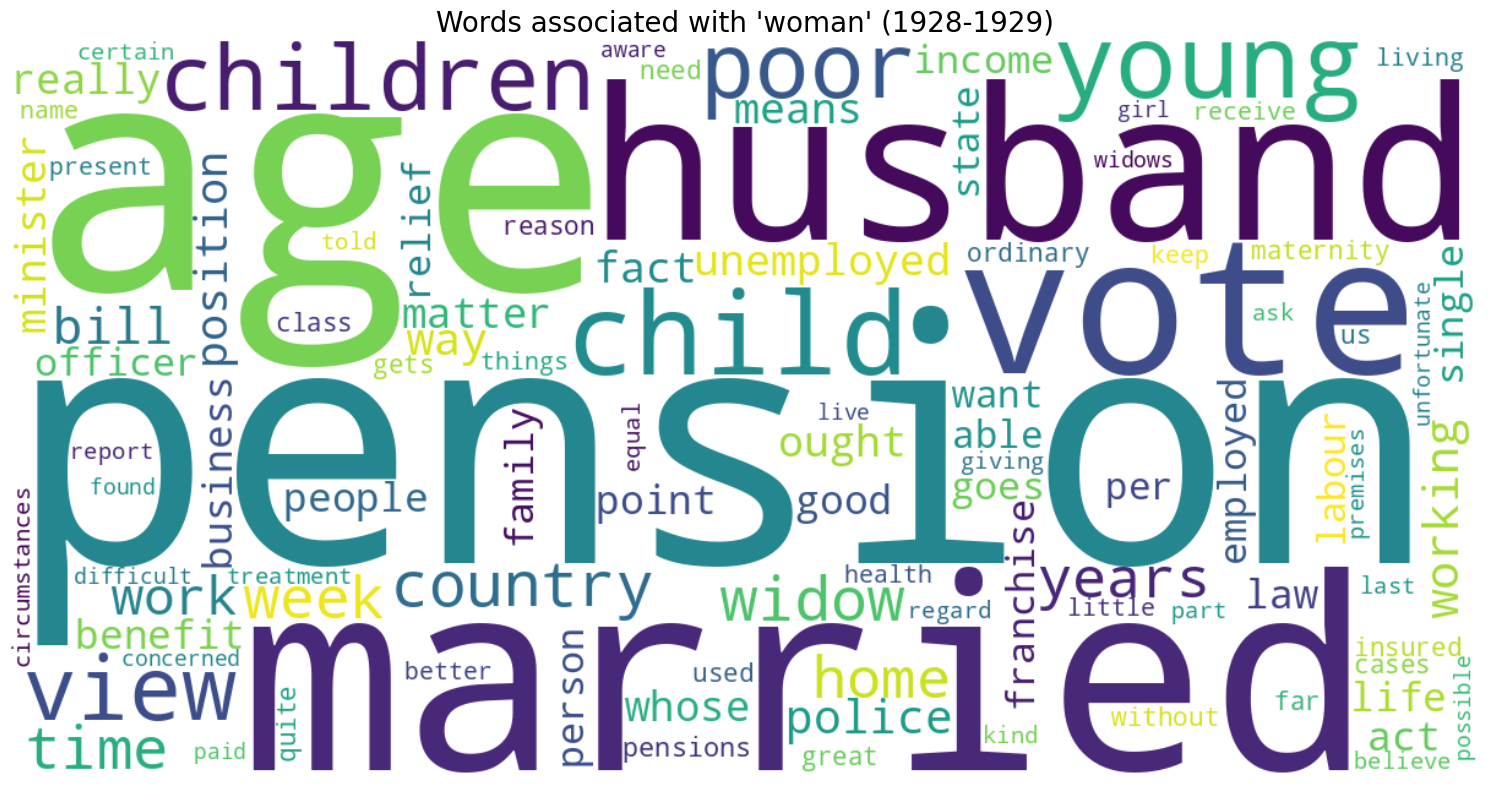

In [25]:
# 1928 Suffrage
generate_word_cloud(zip_path, (1928,1929), 'woman',['case'])

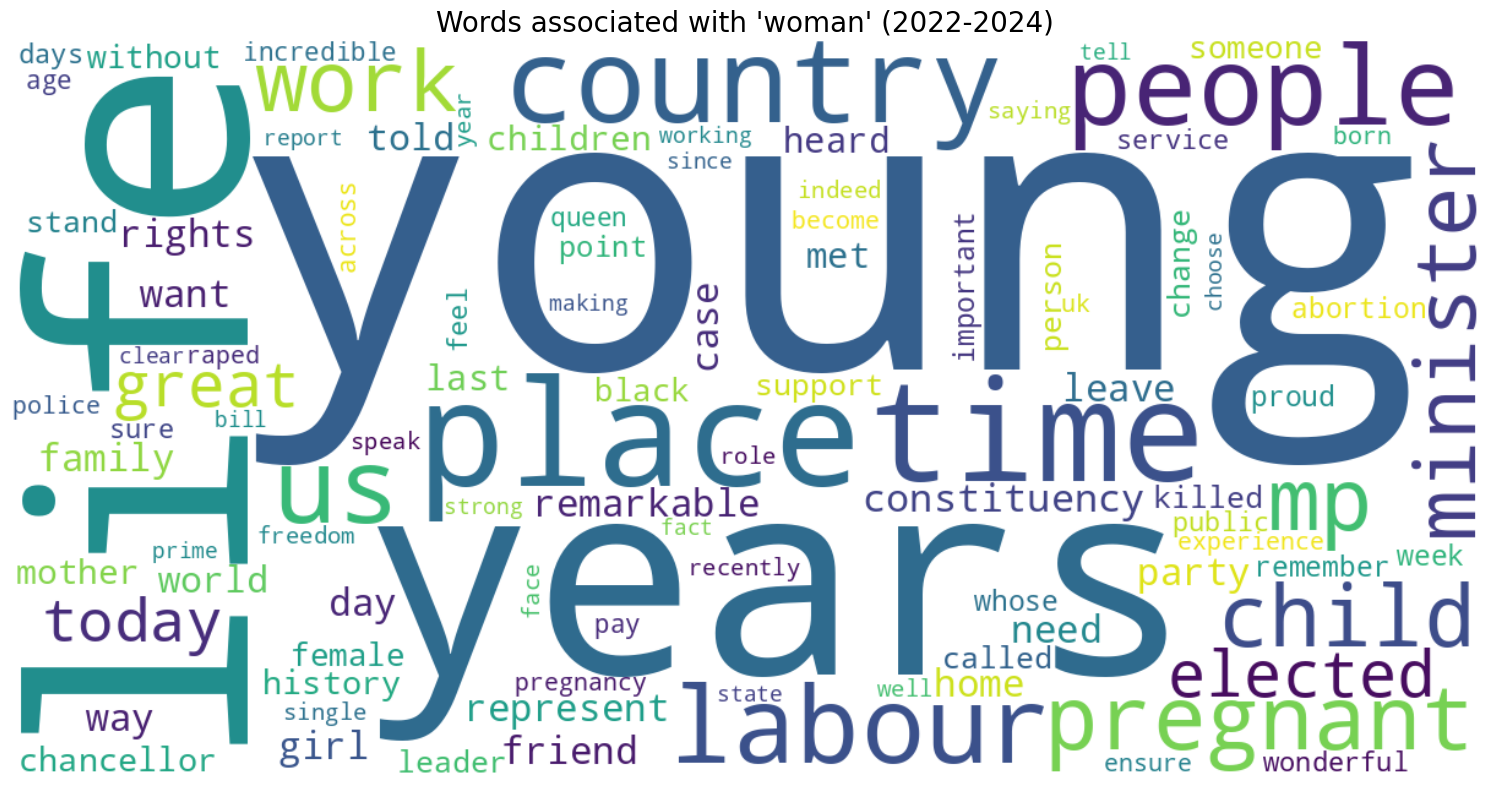

In [26]:
# most recent years
generate_word_cloud(zip_path, (2022,2024), 'woman',[])

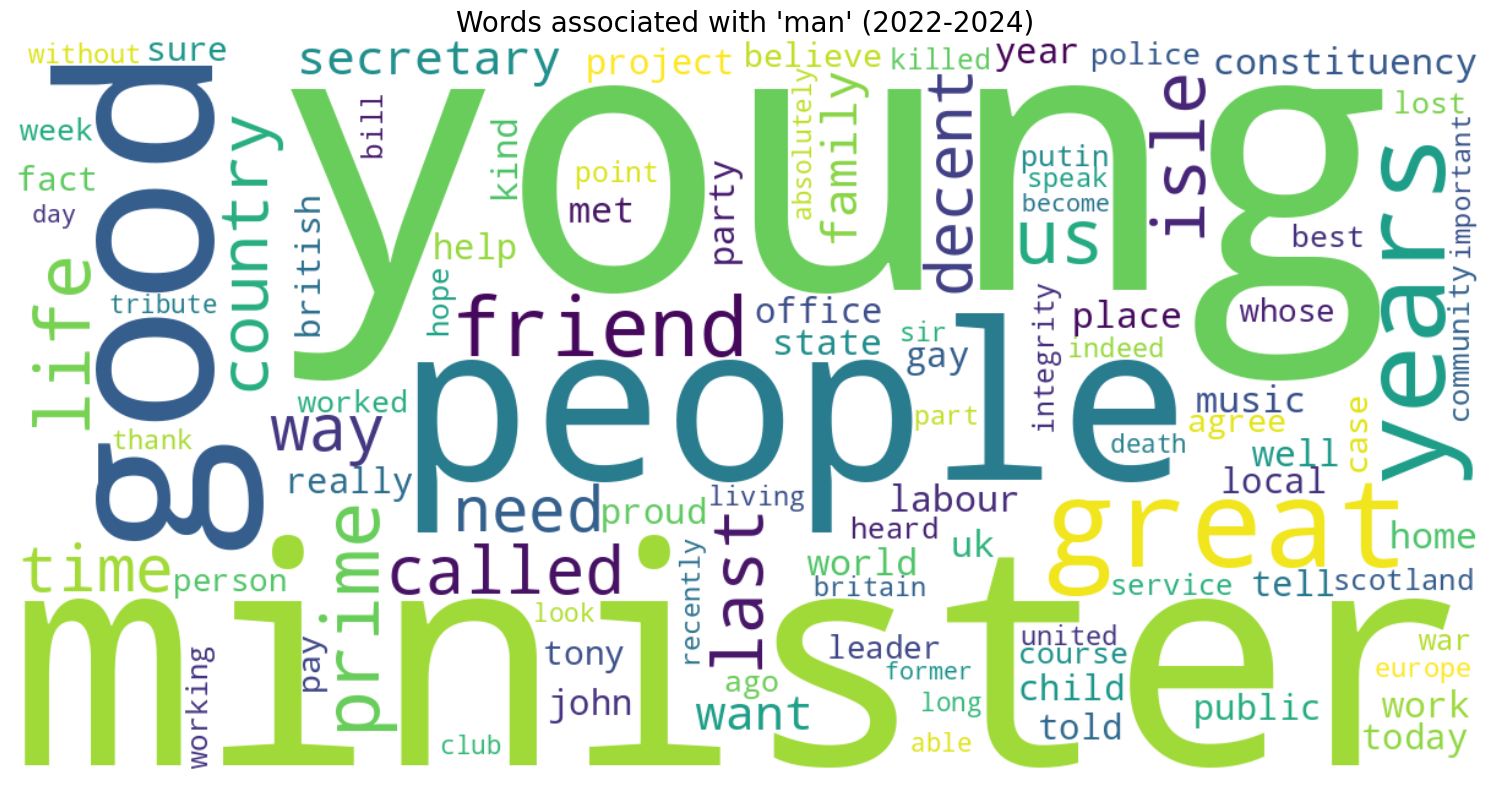

In [27]:
# most recent years
generate_word_cloud(zip_path, (2022,2024), 'man',[])